# CharityML Project
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the project of Finding Donors for CharilityML! This project is based on the *Finding Donors for CharityML Project* in the [Machine Learning Engineer Nanodegree at Udacity Online Course](https://eu.udacity.com/course/machine-learning-engineer-nanodegree--nd009#).

In this project, several supervised algorithms are employed to accurately model individuals' income using data collected from the 1994 U.S. Census. The best candidate algorithm from preliminary results is chosen and optimized to best model the data. The goal is to construct a model that accurately predicts whether an individual makes more than $50,000 or less.This sort of task can arise in a non-profit setting, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, this value can be infered from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. The article by Ron Kohavi can be seen online [here](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data investigated consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. 

----
## Exploring the Data
The code cell below loads the necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be the target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Imports from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Display the first 5 records
display(data.head(n=5))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will indicate about the percentage of these individuals making more than \$50,000. The following are computed in the code cell below:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

In [2]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = np.sum(data['income'].str.count('>50K'))

# Number of records where individual's income is at most $50,000
n_at_most_50k = np.sum(data['income'].str.count('<=50K'))
        
# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/(n_records +1) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:0.4}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


**Features set Exploration**

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries to deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

The code cell below plot a histogram of these two features. Note the range of the values present and how they are distributed.

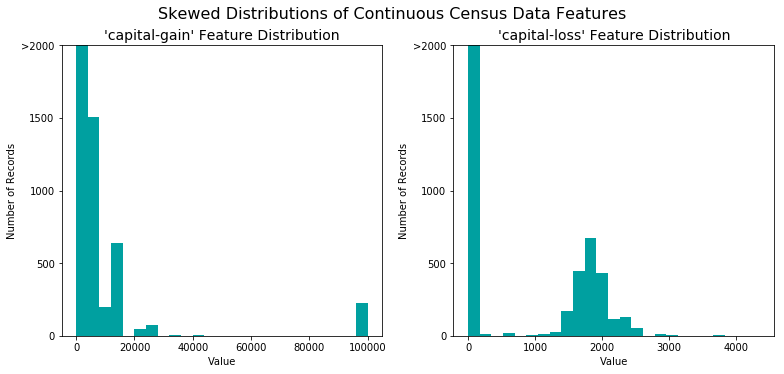

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so the values must be translated by a small amount above `0` to apply the the logarithm successfully.

The code cell below perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

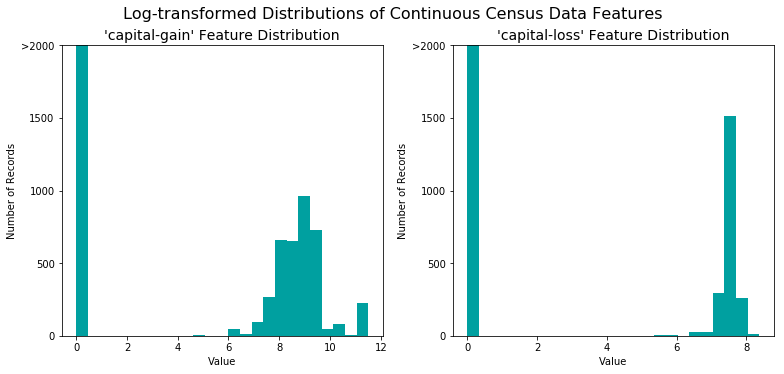

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

The code cell below normalizes each numerical feature. [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) is used for this.

In [5]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

C:\Users\banna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Data Pre-processing

From the table in **Exploring the Data** above, it can be seen that there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. This feature is then encoded into `someFeature_A`, `someFeature_B` and `someFeature_C`.


|  someFeature  | ----> one-hot encode ----> | someFeature_A | someFeature_B | someFeature_C |
| :-----------: | :------------------------: | :------------:| :-----------: | :------------:|
|       B       | ----> one-hot encode ----> |        0      |       1       |        0      |
|       C       | ----> one-hot encode ----> |        0      |       0       |        1      |
|       A       | ----> one-hot encode ----> |        1      |       0       |        0      |



Additionally, as with the non-numeric features, the non-numeric target label, `'income'`, needs to be converted as well into numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), one-hot encoding can be avoided here and simply encode these two categories as `0` and `1`, respectively. 

[`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) is used to perform one-hot encoding on the `'features_log_minmax_transform'` data.
The target label `'income_raw'` is converted into numerical entries. "<=50K" record is converted to `0` and ">50K" to `1`.

In [6]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = pd.Series(np.where(income_raw == '>50K', 1,0))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, the data (both features and their labels) is split into training and test sets. 80% of the data will be used for training and 20% for testing.

The code cell below performs this split.

In [7]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance

In this section, four different algorithms are investigated and the best at modelling the data is determined.
Three of these algorithms will be any supervised learners, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor

*CharityML* knows that individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. **F-beta score** can be used as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since one can say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since any information to substantiate the claim is not considered. It is always important to consider the *naive prediction* for the data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: *if all people made less than \$50,000,* CharityML *would identify no one as donors.*


#### Note: Recap of accuracy, precision, recall

***Recap in the context of spam emails***

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** indicates what proportion of messages is classified as spam, actually were spam.
It is a ratio of true positives (words classified as spam, and which are actually spam) to all positives (all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall(sensitivity)** indicates what proportion of messages that actually were spam were classified as spam.
It is a ratio of true positives (words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in this case. For example, if 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. 90 messages could be classified as not spam (including the 2 that were spam but classified as not spam, hence they would be false negatives) and 10 as spam (all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average (harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score (the harmonic mean is taken as deat with ratios).


### Naive Predictor Performace

Note that the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally the base model would be either the results of a previous model or could be based on a research paper upon which the goal is to be improved. When there is no benchmark model set, getting a result better than random choice is a place to start from.

If a model that always predicted an individual made more than $50,000, thus always predicts `1`, then the model will have no True Negatives (TN) or False Negatives (FN) as the model is not making any negative ('0' value) predictions. Therefore, the Accuracy in this case becomes the same as the Precision value (True Positives/(True Positives + False Positives)) as every prediction that have a value of `1` that should've be `0` becomes a False Positive; therefore the denominator in this case is the total number of records in total.
The Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as there is no False Negatives.

In [8]:
# Calculating the accuracy, precision and recall
accuracy = np.sum(income)/(income.count())
recall = np.sum(income)/(np.sum(income) + 0)
precision = np.sum(income)/(income.count())
b = 0.5

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + b**2)*((precision * recall)/((b**2) * precision + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **for the model:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

###  Model Application

Three supervised learning models candidates are chosen from above and real-world application in industry is given, the strenghts and the weaknesses of the model and when does it perform well and poorly, and its reason for a good candidate for the problem

**_Decision Trees_**

- Describe one real-world application in industry where the model can be applied. 
Decision Trees can be applied into many cases. For instance, one can use them to "identify the relationships between a household and its electricity consumptions in Hong Kong" (http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/, 12.03.2018, 6:53pm)

- What are the strengths of the model; when does it perform well?
Decision Trees requires little preparation, easy to understand, as one can easily draw the tree for visualisation, its data prediction is logarithmic "in the number of data points used to train the tree" (https://scikit-learn.org/stable/modules/tree.html). One can also easily find which features are more significant than others, so it is usefull in data exploration. 

- What are the weaknesses of the model; when does it perform poorly?
The weakness of the model lies in its tendency to overfit. A solution would be the Random Forest model that averages the different outputs of several Trees with limited features.
It does perform poorly also on continuous variables as one has to 'split' the feature as (<= 5 or >5) or more. They are also sensitive to small variations as for instance, (<=8 and >8) is different from the previous example, thus giving a different tree.

- What makes this model a good candidate for the problem, given what you know about the data?
Decision Trees are efficient to binary problems, also it can manage continous variables. But the problem may come from the numerous dummy variables that we generated thus the model may overfit. 

___

**_AdaBoost_**

- Describe one real-world application in industry where the model can be applied. 
One real-world application of Ensemble Method is to face and/or voice recognition. In this paper (https://ieeexplore.ieee.org/document/5178708, 12.04.2018, 3.20pm), they use ensemble method to obtain a higher recognition rate than other individual classifier.

- What are the strengths of the model; when does it perform well?
Compared to a single estimator, the differents ensemble method reduces either the variance or the bias (but not both). Whereas the single estimator would have either a high variance or a high bias. Bagging for example reduces the variance but not the bias whereas Boosting reduces the bias but keeping the variance high (Eun Bae Kong and Thomas G. Dietterich. _Error-correcting output coding corrects bias and variance_. In Proceedings of the Twelfth International Conference on Machine Learning, pages 313–321, 1995)

- What are the weaknesses of the model; when does it perform poorly?
The performance of the model can be reduced if there are lots of noises or if there aren't real 'pattern classification'.

- What makes this model a good candidate for the problem, given what you know about the data?
This model can search for patterns between individual features that can be used by the weak learners and thus gives good results. Moreover, the dummy variables may help here as weak learners need not to be necessarily good.
___

**_Support Vector Machines_**

- Describe one real-world application in industry where the model can be applied. 
A real-world application is in bioinformatics. SVM is used to identifiy the classification of genes, patients on the basis of genes and other biological problems (https://data-flair.training/blogs/applications-of-svm/, 12.04.2018, 4.41pm)

- What are the strengths of the model; when does it perform well?
The model is very effective on non-linear boundaries (as seen during lectures) and works efficiently when a fair margin is recognizable. SVM's are also very robust against overfitting particularly when datas are in high dimensional space.

- What are the weaknesses of the model; when does it perform poorly?
The model doesn't perform well if the kernely aren't chosen correctly. Thus it is time and memory consuming to find the right kernel (https://elitedatascience.com/machine-learning-algorithms, 12.05.2018, 12.44pm)

- What makes this model a good candidate for the problem, given what you know about the data?
This model classify well when we have high dimensions of features. As we added the dummy variables (we now have more than 100 variables), it is as good candidate. 


### Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model chosen, it's important to create a training and predicting pipeline that allows to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. The implementation here will be used in the following sections.

`fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) are imported (see the 1st cell code).

The learner is fitted to the sampled training data and record the training time.

The predictions is performed on the test data `X_test`, and also on the first 300 training points `X_train[:300]`. 

The total prediction time. is recorded.

The accuracy score and the f-score (with a beta value of 0.5) for both the training subset and testing set are calculated.

In [9]:
# Training and Predicting Pipeline
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fitting the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Getting the start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Getting the predictions on the test set(X_test), and the predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial Model Evaluation

The supervised learning models discussed are imported in the 1st code cell of the notebook and are stored in `'clf_A'`, `'clf_B'`, and `'clf_C'`. `'random_state'`is used for each model. For now, the default setting for each model is used. The tuning of one specific model will be performed later on.

The number of records equal to 1%, 10%, and 100% of the training data are computed and those values are stored in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms chosen, the following implementation may take some time to run!

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


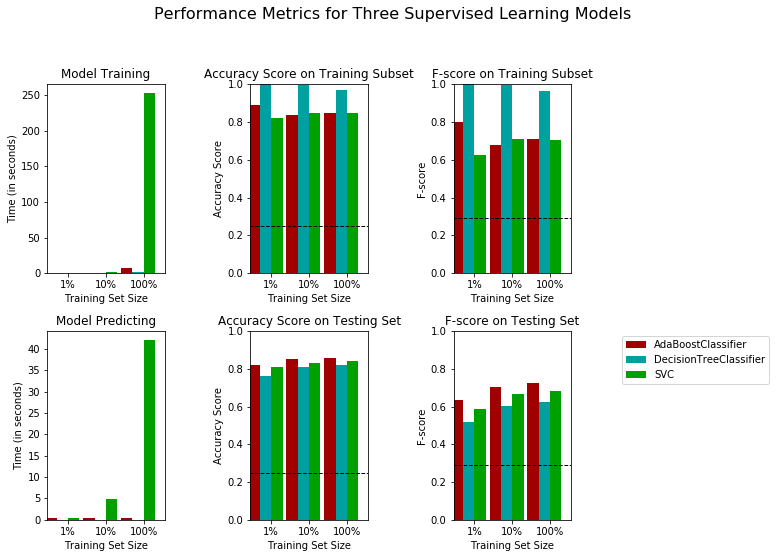

In [10]:
# Initialize the three candidates model
clf_A = AdaBoostClassifier(random_state = 1)
clf_B = DecisionTreeClassifier(random_state = 1)
clf_C = SVC(random_state = 1, gamma = 'scale')

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100 (ensuring to set the count of the values to be `int` and not `float`)
# samples_1 is 1% of samples_100 (ensuring to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, the *best* model is chosen among the three supervised learning models discussed to use on the dataset. A grid search optimization is then performed for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Choosing the Best Model

According the the cell above, AdaBoost seems to be the most efficient as its accuracy and fscore are the highest on the testing sets when 100%, 10% and 1% of the training set are used. Moreover, one can observe an increase on both metrics for Adaboost (actually on all three models) when one's using more and more training datas. The prediction time for SVC is the longest between all three but Adaboost seems to have a constant (approximately) time of predictions on the testing set. Also, the Adaboost model is particularly efficient on binary classification problems as it is the case of this problem. The model to be used is then Adaboost.

### Describing the Model in Layman's Terms

This model uses several small classifiers in order to find our final model. First, the small classifiers uses a random part of the dataset, called the 'training set'. The small classifiers are used one after another until all of them are used. Of course they will misclassify some points but that is okay as there are several small classifiers that will classify them afterwards. At each small classification, the boundary that classified the points as positive ('earns more than 50K') and negative ('earns less or equal than 50K') and the label of each area ('positive' or 'negative') are stored. At the end, the imposition of those boundaries gives us the final model. An area is considered 'positive' if it was labelled more often 'positive' than 'negative'. An area is considered 'negative' if it was labelled more often 'negative' than 'positive'.

The final model is then used on the remaining dataset that weren't use, called the 'testing set'. This is to make sure that our final model behaves efficiently. If it does, the final model can be used to classify an unknown data (new person) and classify the person as earning more than 50K or less.

### Model Tuning

Fine tuning the chosen model. The grid search (`GridSearchCV`) is used with at least one important parameter tuned with at least 3 different values. The entire training set is needed here.

[`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) are imported (check the 1st code cell).

The classifier chosen is stored in `clf`. A `random_state` is set to the same state as before.

A dictionary of parameters is created to be tuned for the chosen model. Example: `parameters = {'parameter' : [list of values]}`.

**Note:** Avoid tuning the `max_features` parameter of the learner if that parameter is available!
`make_scorer` is used to create an `fbeta_score` scoring object (with $\beta = 0.5$).

Grid search is performed on the classifier `clf` using the `'scorer'` and is stored in `grid_obj`. The grid search object is fitted to the training data (`X_train`, `y_train`) and is stored in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [11]:
# Initialize the classifier
clf = AdaBoostClassifier(random_state = 101)

# Create the parameters list wished to tune, using a dictionary if needed.
# Example:
# parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'base_estimator': [None], 'n_estimators': [50,60,70,80], 'learning_rate':[0.001, 0.01, 0.1, 1]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-after scores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\banna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\banna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\banna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\banna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\banna\Anaconda3\lib\site-packages

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8611
Final F-score on the testing data: 0.7325


### Final Model Evaluation

#### Results:

|     Metric     | Naive Predictor   | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :---------------: | :--------------:|
| Accuracy Score |       0.2478      |      0.8576       |      0.8611     |
| F-score        |       0.2917      |      0.7246       |      0.7325     |

The Naive Predictor has an accuracy-score of 0.2478 and an F-score of 0.2917. The Optimized Model has an accuracy-score of 0.8611 and an F-score 0.7325. Thus the optimized model is then much better than the Naive predictor which is good news. Also the optimized model is slightly better than the unoptimized model which is also good news.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data studied here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label one simplify the understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means that a small number of features need to be identified that most strongly predict whether an individual makes at most or more than \$50,000.

A scikit-learn classifier is chosen (e.g. adaboost or random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier. This classifier is then fitted to the training set and this attribute is used to determine the top 5 most important features for the census dataset.

### Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. 

**Features set Exploration is listed again**

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


Of these thirteen records, **by intuition** the 5 features that are the most important for prediction and their rankings are the following.

1. **OCCUPATION** would be the most important feature for prediction. Indeed there are huge differences in their salaries according to one's job. An Exec-Managerial would earn much more than a Farming-Fishing or between a Prof-Speciality or a Handlers-Cleaners, etc. 

2. **CAPITAL GAIN** would be the 2nd most important feature as it is where the value of investments and real-estates increases. This feature has a direct impact on whether one is earning more than 50K.

3. **EDUCATION-LEVEL** would be the 3rd most important feature. Indeed, a Doctorate would have higher salary than a person with an education level of 9th grade because he would have a higher education on one field, thus having more chance to get a higher salary. 

4. **HOURS-PER-WEEK** would suggest a higher probability of earning more than 50K. This makes sense as the more one works, the more one get paid.

5. **AGE** would be the 5th most important feature among the 13. Indeed, an 18 years old person would probably earn less than a person which is older.

### Extracting Feature Importance

A `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it is chosen. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, a supervised learning model from sklearn is imported, and trained on the entire training set. The feature importances using `'.feature_importances_'` is extracted.

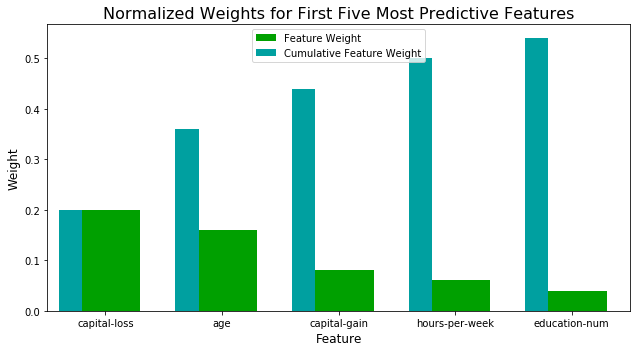

In [12]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Extraction of the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Extracting Feature Importance

The visualization created above displays the most relevant features for predicting if an individual makes at most or above \$50,000.

From the *intuitions* above, only 3 out of 5 were correct. Capital Gain, Age and Hours-per-week were correct and Capital-loss and Education-num weren't taken in account.

Education-num is important indeed as the higher number of years of education one has, the higher the income. There is a correlation between these two factors, but more than expected.

Capital-loss is considered one of the 5 most important feature for the prediction. It is indeed, an important one as the more one loses of his capital, the less one earns.

### Feature Selection

With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, one can see that the top five most important features contribute more than half of the importance of **all** features present in the data.

With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, one can see that the top five most important features contribute more than half of the importance of **all** features present in the data. Thus it can be attempted to *reduce the feature space* and simplify the information required for the model to learn.

The code cell below will use the same optimized model found earlier, and train it on the same training set *with only the top five important features*. 

In [13]:
# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8611
F-score on testing data: 0.7325

Final Model trained on reduced data
------
Accuracy on testing data: 0.8323
F-score on testing data: 0.6749


### Effects of Feature Selection

|     Metric     | Naive Predictor   |     Full Datas    |  Reduced Datas    |
| :------------: | :---------------: | :---------------: | :----------------:|
| Accuracy Score |       0.2478      |       0.8611      |      0.8323       |
| F-score        |       0.2917      |       0.7325      |      0.6749       |

The accuracy-score and fscore slightly decreased for the Reduced Datas as there are less datas on to train the model. But in overall, those metrics are high enough than the Naive Predictor. There is a difference of less than 1% for the accuracy score and the fscore to the Full datas (Optimized Model).

If the training time was a factor to take in account, the reduced datas would be used for the training set as the difference between them is less than 1%.